In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import TomoTools

### Read the input data and produce a version that is spatially binned by a factor of 2

In [2]:
"""Define data location and load into memory using the IMOD reader"""

datapath = 'C:/Users/aherzing/OneDrive - National Institute of Standards and Technology (NIST)/Work/NISTmAb'
filename = 'Trimer_mAb_HAADF.ali'
os.chdir(datapath)
stack = TomoTools.load(filename,reader='IMOD')
rebin = stack.rebin(2)

Tilts loaded from .RAWTLT File


### Reconstruct the spatially binned data

In [3]:
"""Extract a single slice from the full tilt series for reconstruction inspection.  Slice 300 is chosen as this is far from
   the central contamination line.  This slice is then reconstructed using weighted backprojection as well as SIRT using
   5,10,15,20,25, and 30 iterations.  The WBP reconstruction is simply a 2D Numpy array while all of the SIRT reconstructions
   are stored in a dictionary. NOTE: SIRT is performed using a positivity constraint (threshold = 0.0)"""

singleslice = rebin.deepcopy()
singleslice.data = singleslice.data[:,300:301,:]
recWBP = singleslice.reconstruct('astraWBP',thickness=25,CUDA=False)

iters = [5,25,50,75,100,125,150,175,200]
recSIRTs = {}
for i in iters:
    recSIRTs[str(i)] = singleslice.reconstruct('astraSIRT',thickness=25,iterations=i,constrain=False,CUDA=True)

Reconstructing single slice using CPU-based WBP in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 16.03it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  7.12it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 10.68it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  3.36it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  2.54it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  1.73it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  1.46it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  1.38it/s]


Reconstruction complete


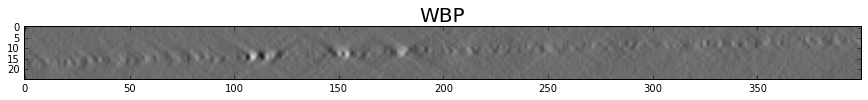

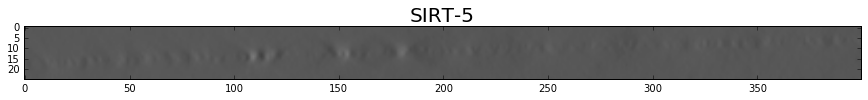

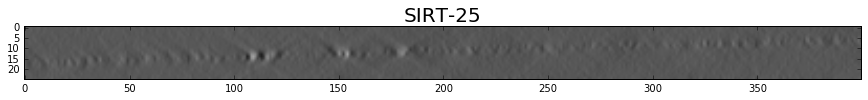

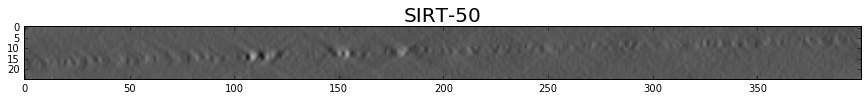

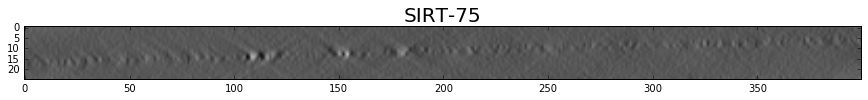

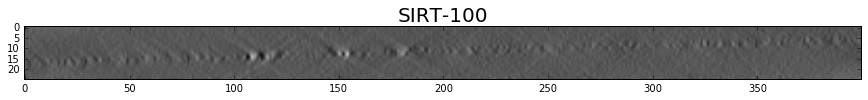

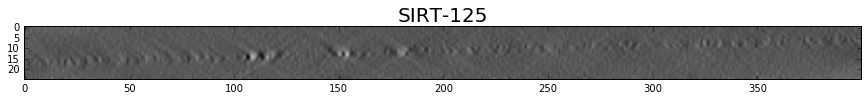

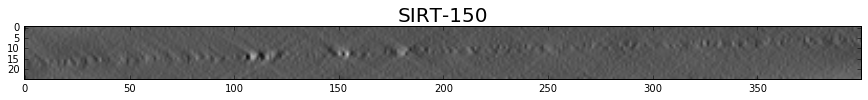

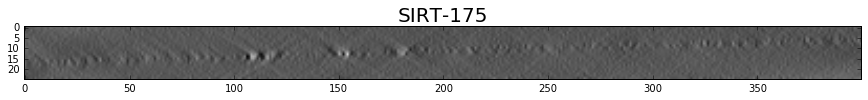

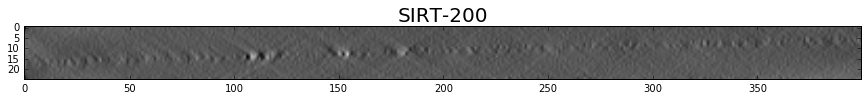

In [4]:
"""Display the various reconstructions for comparison"""

fig,ax = plt.subplots(1,figsize=(15,8))
ax.imshow(recWBP.data[:,50:450],clim=[-4000,3000],cmap='gray_r')
ax.set_title('WBP',size=20)
    
for i in iters:
    fig,ax = plt.subplots(1,figsize=(15,8))
    ax.imshow(recSIRTs[str(i)].data[:,50:450],clim=[-4000,3000],cmap='gray_r')
    ax.set_title('SIRT-%s' % str(i),size=20)

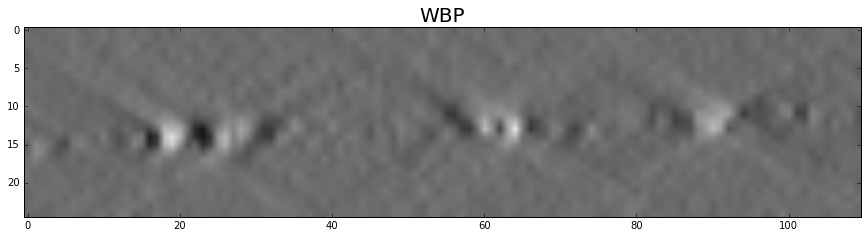

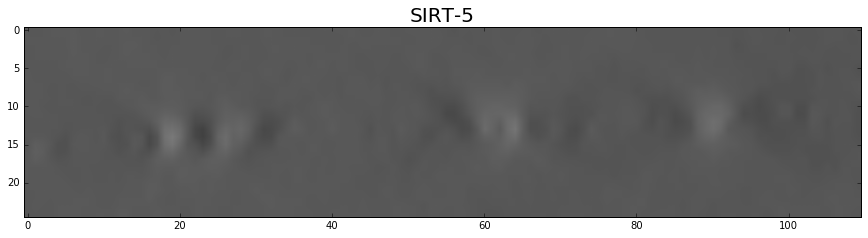

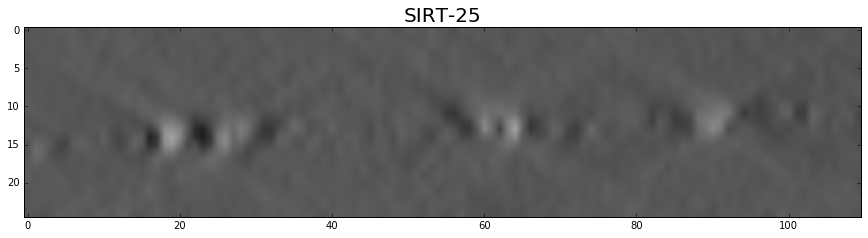

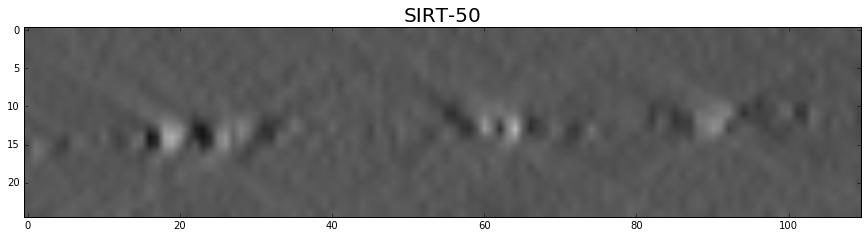

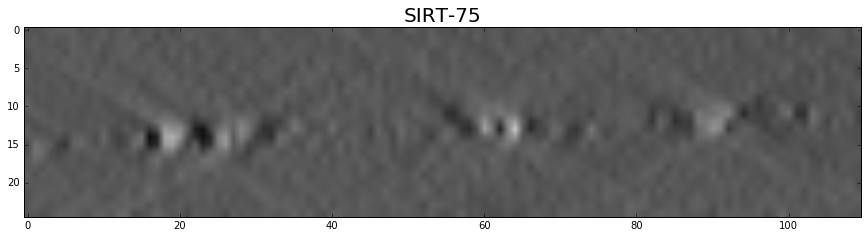

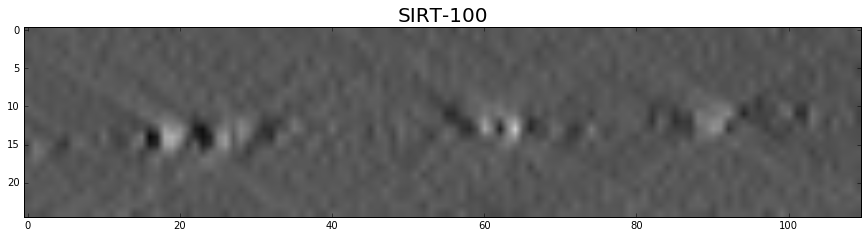

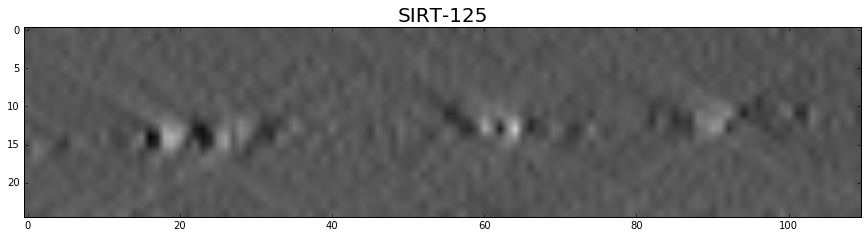

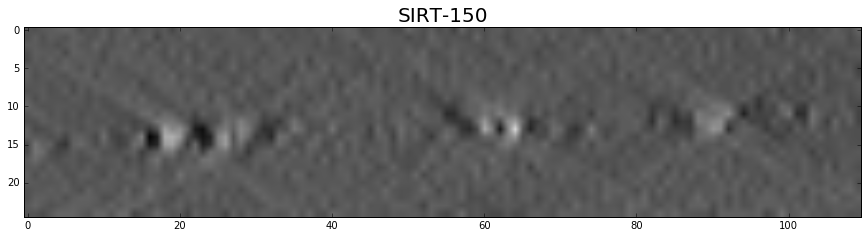

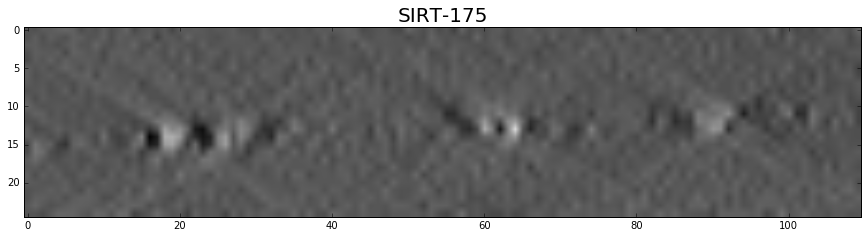

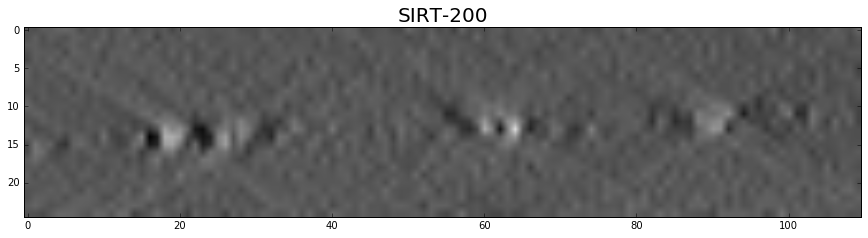

In [5]:
"""Display a zoomed version of various reconstructions for comparison"""
fig,ax = plt.subplots(1,figsize=(15,8))
ax.imshow(recWBP.data[:,140:250],clim=[-4000,3000],cmap='gray_r')
ax.set_title('WBP',size=20)
    
for i in iters:
    fig,ax = plt.subplots(1,figsize=(15,8))
    ax.imshow(recSIRTs[str(i)].data[:,140:250],clim=[-4000,3000],cmap='gray_r')
    ax.set_title('SIRT-%s' % str(i),size=20)

### Reconstruct the entire binned stack
#### Takes less than a minute for each reconstruction

In [6]:
recWBPbinned = rebin.reconstruct('astraWBP',thickness=25,CUDA=False)
recSIRTbinned = rebin.reconstruct('astraSIRT',thickness=25,iterations=100,constrain=False,CUDA=True)

Reconstructing single slice using CPU-based WBP in the Astra Toolbox


100%|████████████████████████████████████████| 512/512 [00:32<00:00, 16.02it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 4/4 [00:25<00:00,  6.30s/it]


Reconstruction complete


   ### Save the binned reconstructions

In [16]:
recWBPbinned.save('Trimer_mAb_HAADF_2XBin_WBP.hdf5')
recSIRTbinned.save('Trimer_mAb_HAADF_2XBin_SIRT100.hdf5')

recWBPbinned.save('Trimer_mAb_HAADF_2XBin_WBP.rpl')
recSIRTbinned.save('Trimer_mAb_HAADF_2XBin_SIRT100.rpl')

### Reconstruct the non-binned data

In [6]:
"""Extract a single slice from the full tilt series for reconstruction inspection.  Slice 150 is chosen as this is far from
   the central contamination line.  This slice is then reconstructed using weighted backprojection as well as SIRT using
   5,10,15,20,25, and 30 iterations.  The WBP reconstruction is simply a 2D Numpy array while all of the SIRT reconstructions
   are stored in a dictionary. NOTE: SIRT is performed using a positivity constraint (threshold = 0.0)"""

singleslice = stack.deepcopy()
singleslice.data = singleslice.data[:,150:151,:]
recWBP = singleslice.reconstruct('astraWBP',thickness=50,CUDA=False)

iters = [5,25,50,75,100,125,150,175,200]
recSIRTs = {}
for i in iters:
    recSIRTs[str(i)] = singleslice.reconstruct('astraSIRT',thickness=50,iterations=i,constrain=False,CUDA=True)

Reconstructing single slice using CPU-based WBP in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  4.01it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 21.37it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  7.12it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  3.37it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  2.14it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  1.69it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  1.14it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:01<00:00,  1.03s/it]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 1/1 [00:01<00:00,  1.16s/it]


Reconstruction complete


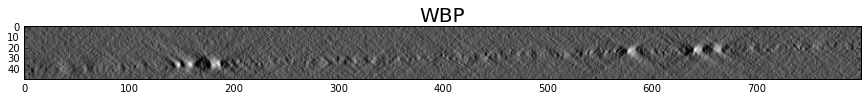

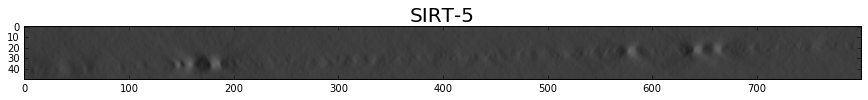

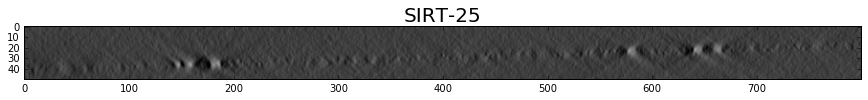

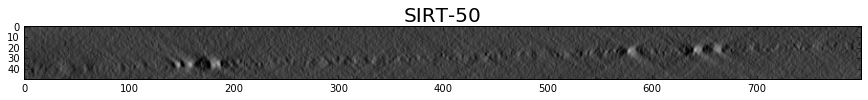

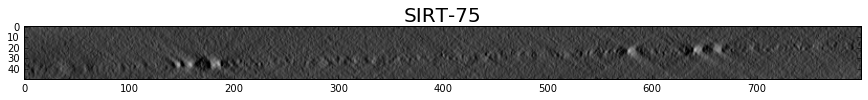

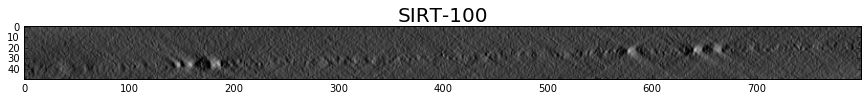

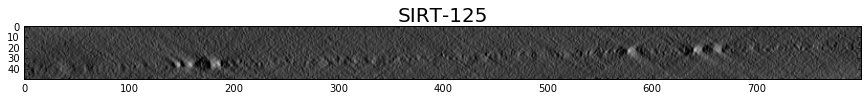

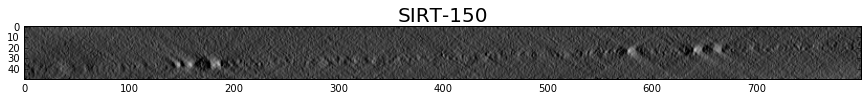

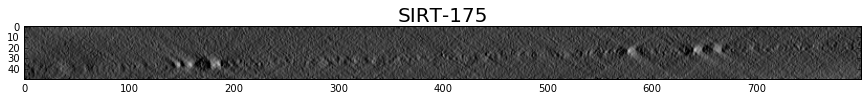

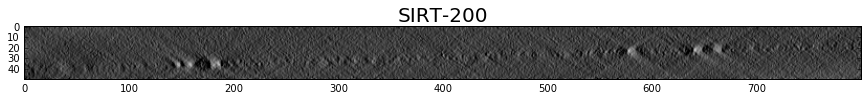

In [7]:
"""Display the various reconstructions for comparison"""

fig,ax = plt.subplots(1,figsize=(15,8))
ax.imshow(recWBP.data[:,100:900],clim=[-2000,1000],cmap='gray_r')
ax.set_title('WBP',size=20)
    
for i in iters:
    fig,ax = plt.subplots(1,figsize=(15,8))
    ax.imshow(recSIRTs[str(i)].data[:,100:900],clim=[-2000,1000],cmap='gray_r')
    ax.set_title('SIRT-%s' % str(i),size=20)

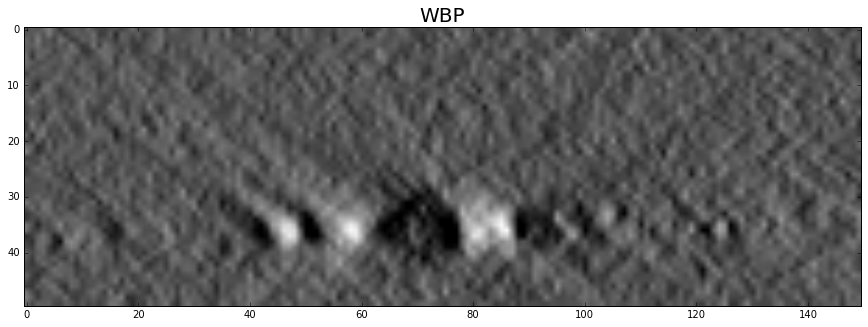

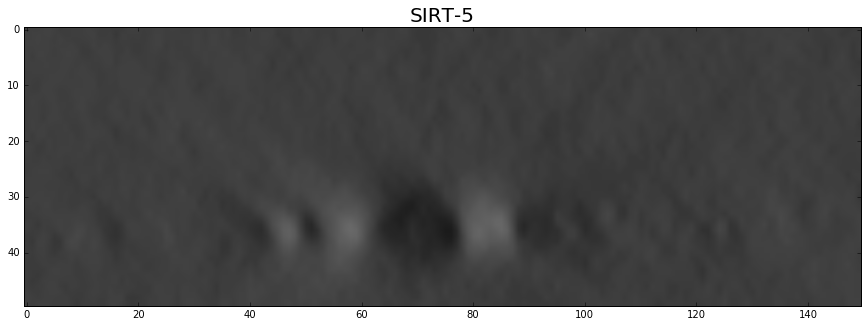

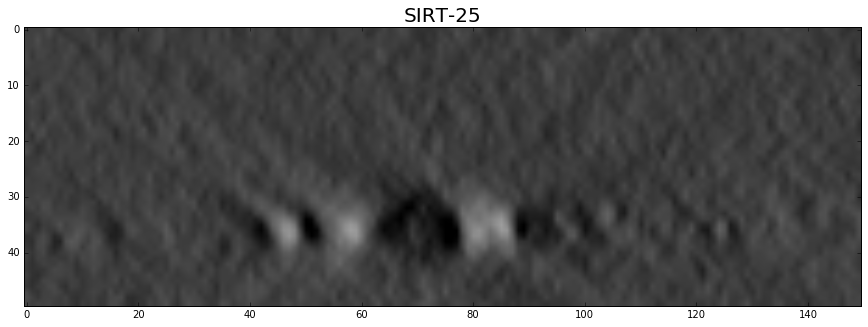

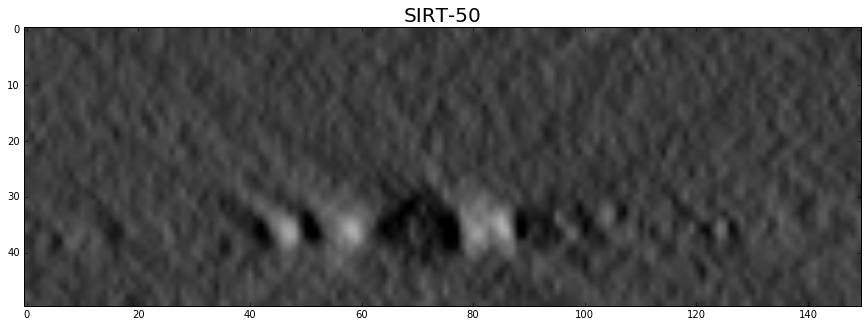

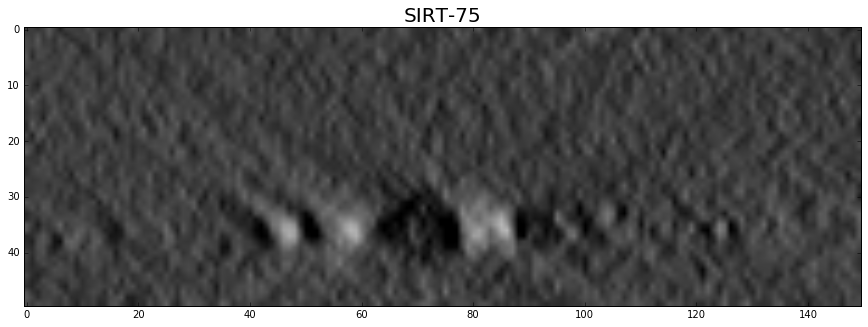

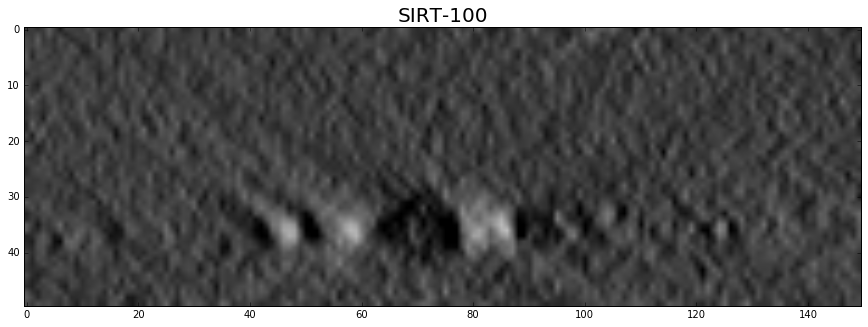

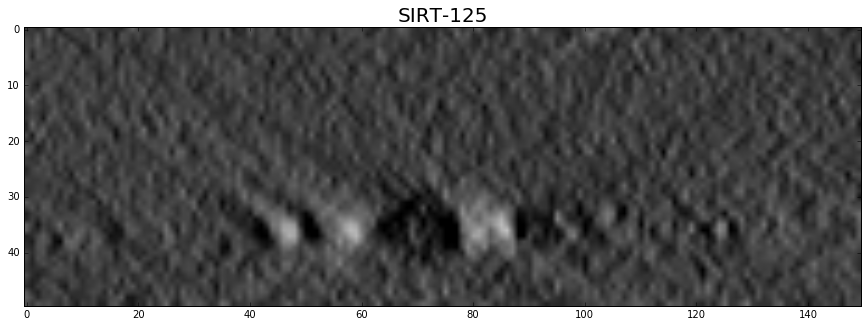

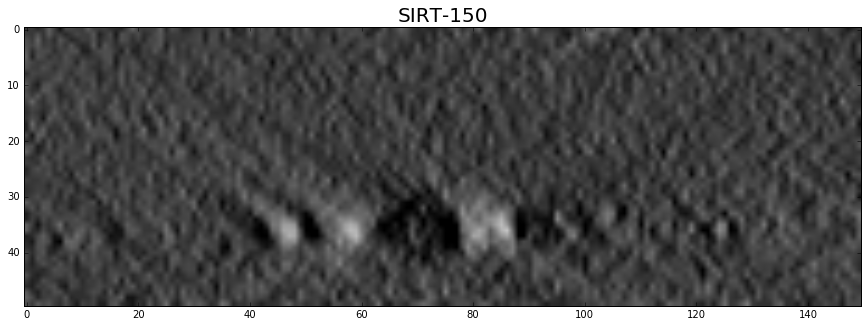

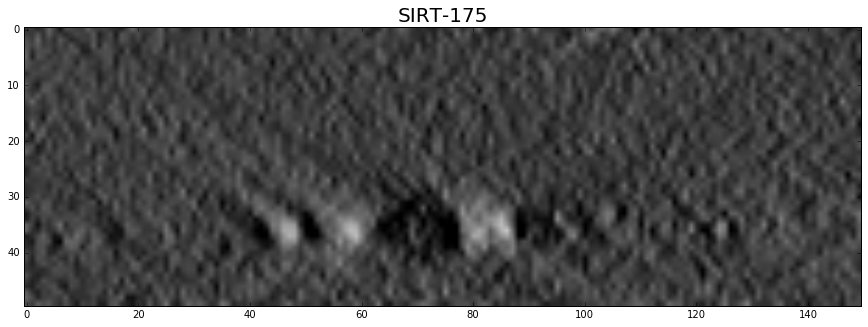

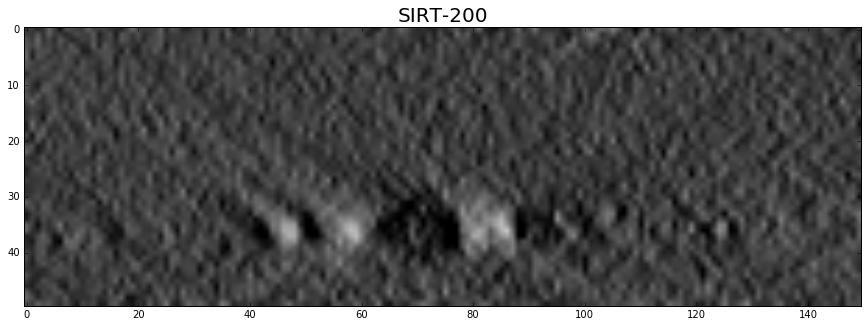

In [11]:
"""Display a zoomed version of various reconstructions for comparison"""
fig,ax = plt.subplots(1,figsize=(15,8))
ax.imshow(recWBP.data[:,200:350],clim=[-2000,1000],cmap='gray_r')
ax.set_title('WBP',size=20)
    
for i in iters:
    fig,ax = plt.subplots(1,figsize=(15,8))
    ax.imshow(recSIRTs[str(i)].data[:,200:350],clim=[-2000,1000],cmap='gray_r')
    ax.set_title('SIRT-%s' % str(i),size=20)

### Reconstruct the entire unbinned stack
#### Takes approximately 5 minutes for WBP and 3 minutes for SIRT
- Multicore processing is currently broken but will speed up the WBP reconstruction
- Counterintuitively, the WBP reconstruction is slightly faster on the CPU.  This is due to the fact that there is not 3D WBP algorithm in Astra so the overhead time of transferring each slice to the GPU and back is limiting
- There is 3D BP algorithm, so we could potentially pre-filter the stack and then run BP on the GPU.  I'm looking into this

In [8]:
recWBPfull = stack.reconstruct('astraWBP',thickness=50,CUDA=False)
recSIRTfull = stack.reconstruct('astraSIRT',thickness=50,iterations=100,constrain=False,CUDA=True)

Reconstructing single slice using CPU-based WBP in the Astra Toolbox


100%|██████████████████████████████████████| 1024/1024 [04:10<00:00,  4.09it/s]


Reconstruction complete
Reconstructing data using CUDA Accelerated SIRT in the Astra Toolbox


100%|████████████████████████████████████████████| 8/8 [02:48<00:00, 21.03s/it]


Reconstruction complete


   ### Save the unbinned reconstructions
   - MRC writer has been fixed
   - Hyperspy can read the HDF5 format readily
   - Alternatively, save as a RAW/RPL file pair.  RAW is a header free binary format, RPL is a text file containing dimensions

In [17]:
recWBPfull.save('Trimer_mAb_HAADF_Full_WBP.rec')
recSIRTfull.save('Trimer_mAb_HAADF_Full_WBP.rec')

recWBPfull.save('Trimer_mAb_HAADF_Full_WBP.hdf5')
recSIRTfull.save('Trimer_mAb_HAADF_Full_SIRT100.hdf5')

recWBPfull.save('Trimer_mAb_HAADF_Full_WBP.rpl')
recSIRTfull.save('Trimer_mAb_HAADF_Full_SIRT.rpl')